# K-Nearest Neighbour Algorithm

KNN algorithm is a machine learning algorithm which is used to solve both regression and classification problem.

As name suggests it predicts the output based on K nearest datapoint, It uses Euclidean distnace formula to decide which data point is nearest to k data points and assigns them a label. We can also use Hamming distance, Manhattan distance, Minkowski distance as per our need.

In This algorith distance metric and value of k has significant importance on prediction


### Choosing value of k

The value k represents the data points which are used to determine target class of unknown datapoint. Value of k is determine by tuning value for k.

In [1]:
# Let's import libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
lp = pd.read_csv("D:/ML_Datasets/loan_approval_dataset.csv")
lp.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
lp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


For KNN we need to do data pre-paration

1. Scaling : We need to scale all the data points in same range so that we will will be able to locate in multi-dimentional space.
2. Dimensionality reduction : KNN algorithm is not effiecient if data set have more features. Thus, we need to use feature selection or principal component algorithm technique for dimensionality reduction.
3. Missing value. : if dataset contains any missing value then we need to delete that row because KNN won't be able to locate data points from that point.


In [4]:
# Let's check if there is any missing or null data point.
lp.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [5]:
# Let's normalize the dataset

lp.min()



loan_id                              1
 no_of_dependents                    0
 education                    Graduate
 self_employed                      No
 income_annum                   200000
 loan_amount                    300000
 loan_term                           2
 cibil_score                       300
 residential_assets_value      -100000
 commercial_assets_value             0
 luxury_assets_value            300000
 bank_asset_value                    0
 loan_status                  Approved
dtype: object

In [6]:
lp.max()

loan_id                               4269
 no_of_dependents                        5
 education                    Not Graduate
 self_employed                         Yes
 income_annum                      9900000
 loan_amount                      39500000
 loan_term                              20
 cibil_score                           900
 residential_assets_value         29100000
 commercial_assets_value          19400000
 luxury_assets_value              39200000
 bank_asset_value                 14700000
 loan_status                      Rejected
dtype: object

In [7]:
# we will loose id colun as it doen't havve any significance for this prediction.
lp1= lp.iloc[:, 1:]
lp1

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [8]:
lp2 = lp1.drop(lp1.columns[[1, 2, 11]], axis=1)

lp2

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000


Text(0, 0.5, 'loan_status')

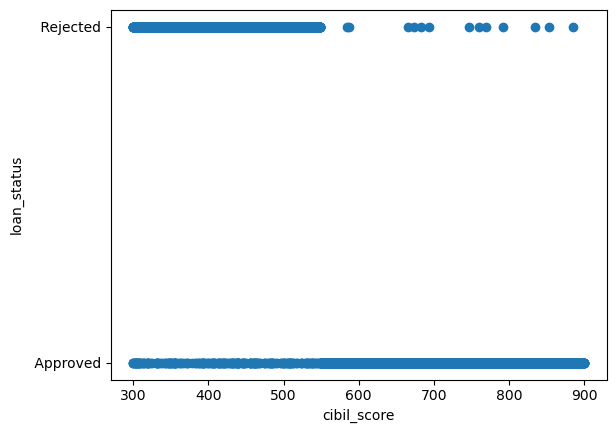

In [20]:
plt.scatter(lp1[' cibil_score'], lp1[' loan_status'])
plt.xlabel('cibil_score')
plt.ylabel('loan_status')

In [9]:
min_values = lp2.min()
max_values = lp2.max()

lp3 = (lp2 - min_values)/(max_values - min_values)

lp3

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,0.4,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218
1,0.0,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490
2,0.6,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748
3,0.6,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415
4,1.0,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136
...,...,...,...,...,...,...,...,...,...
4264,1.0,0.082474,0.051020,0.555556,0.028333,0.099315,0.025773,0.077121,0.054422
4265,0.0,0.319588,0.280612,1.000000,0.431667,0.147260,0.149485,0.275064,0.129252
4266,0.4,0.649485,0.602041,0.888889,0.261667,0.044521,0.639175,0.457584,0.496599
4267,0.2,0.402062,0.318878,0.333333,0.800000,0.284247,0.036082,0.354756,0.394558


In [10]:

l = lp1.iloc[:, [1,2,11]]
lp4 = pd.concat([lp3, l], axis=1)

lp4

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education,self_employed,loan_status
0,0.4,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,Graduate,No,Approved
1,0.0,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,Not Graduate,Yes,Rejected
2,0.6,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,Graduate,No,Rejected
3,0.6,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,Graduate,No,Rejected
4,1.0,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,Not Graduate,Yes,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,1.0,0.082474,0.051020,0.555556,0.028333,0.099315,0.025773,0.077121,0.054422,Graduate,Yes,Rejected
4265,0.0,0.319588,0.280612,1.000000,0.431667,0.147260,0.149485,0.275064,0.129252,Not Graduate,Yes,Approved
4266,0.4,0.649485,0.602041,0.888889,0.261667,0.044521,0.639175,0.457584,0.496599,Not Graduate,No,Rejected
4267,0.2,0.402062,0.318878,0.333333,0.800000,0.284247,0.036082,0.354756,0.394558,Not Graduate,No,Approved


In [11]:
# Let's encode catagorical input variable

lp5 = pd.get_dummies(lp4, columns=[' education', ' self_employed'])

# let's encode target variable

lp5[' loan_status'] = lp5[' loan_status'].replace(['Approve'], 'Approved')

lp5

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
0,0.4,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,Approved,1,0,1,0
1,0.0,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,Rejected,0,1,0,1
2,0.6,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,Rejected,1,0,1,0
3,0.6,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,Rejected,1,0,1,0
4,1.0,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,Rejected,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,1.0,0.082474,0.051020,0.555556,0.028333,0.099315,0.025773,0.077121,0.054422,Rejected,1,0,0,1
4265,0.0,0.319588,0.280612,1.000000,0.431667,0.147260,0.149485,0.275064,0.129252,Approved,0,1,0,1
4266,0.4,0.649485,0.602041,0.888889,0.261667,0.044521,0.639175,0.457584,0.496599,Rejected,0,1,1,0
4267,0.2,0.402062,0.318878,0.333333,0.800000,0.284247,0.036082,0.354756,0.394558,Approved,0,1,1,0


In [12]:
lp5[' loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [13]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit([' Approved', ' Rejected'])

print(le.classes_)

#lp5[' loan_status'].isin([' Approve'])

lp5[' loan_status'] = le.transform(lp5[' loan_status'])

list(le.inverse_transform([0,1]))

lp5

[' Approved' ' Rejected']


,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
0,0.4,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,0,1,0,1,0
1,0.0,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,1,0,1,0,1
2,0.6,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,1,1,0,1,0
3,0.6,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,1,1,0,1,0
4,1.0,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,1.0,0.082474,0.051020,0.555556,0.028333,0.099315,0.025773,0.077121,0.054422,1,1,0,0,1
4265,0.0,0.319588,0.280612,1.000000,0.431667,0.147260,0.149485,0.275064,0.129252,0,0,1,0,1
4266,0.4,0.649485,0.602041,0.888889,0.261667,0.044521,0.639175,0.457584,0.496599,1,0,1,1,0
4267,0.2,0.402062,0.318878,0.333333,0.800000,0.284247,0.036082,0.354756,0.394558,0,0,1,1,0


In [21]:
# Let's split data into train, valid ans test data


train_data = lp5.sample(frac = 0.6, random_state = 42)
#output_train = data['Price'].sample(frac = 0.6, random_state=42)

test_val_data = lp5.drop(train_data.index)
#output_test_val = data['Price'].drop(output_train.index)

val_data = test_val_data.sample(frac = 0.5, random_state = 42)
#output_val = output_test_val.sample(frac = 0.5, random_state = 42)

test_data = test_val_data.drop(val_data.index)
#output_test = output_test_val.drop(output_val.index)


print("Train dataset:", train_data.shape[0])
print("Validation dataset:", val_data.shape[0])
print("test dataset:", test_data.shape[0])


Train dataset: 2561
Validation dataset: 854
test dataset: 854


In [26]:
cols = pd.concat([lp5.iloc[:, 0:9], lp5.iloc[:, 10:14]])
x_train = train_data[cols.columns]
y_train = train_data[" loan_status"]

x_val = val_data[cols.columns]
y_val = val_data[" loan_status"]

x_test = test_data[cols.columns]
y_test = test_data[[" loan_status"]]

print(x_train)

       no_of_dependents   income_annum   loan_amount   loan_term  \
1703                1.0       0.536082      0.494898    1.000000   
1173                0.4       0.587629      0.349490    0.333333   
308                 0.6       0.969072      0.500000    0.666667   
1322                0.4       0.618557      0.589286    0.333333   
3271                0.6       0.577320      0.352041    0.555556   
...                 ...            ...           ...         ...   
3559                0.8       0.257732      0.265306    0.222222   
2087                0.0       0.536082      0.489796    0.777778   
1889                1.0       0.690722      0.466837    0.888889   
1591                0.2       0.958763      0.579082    0.444444   
3936                1.0       0.103093      0.053571    0.666667   

       cibil_score   residential_assets_value   commercial_assets_value  \
1703      0.205000                   0.226027                  0.515464   
1173      0.498333               

# Choosing value of k

To choose value of k we need to testrange of value on train & validation data becuase when k is low train error is low and  test data error is high which introduces variance.

So we need to choose value of k where validation error is low.

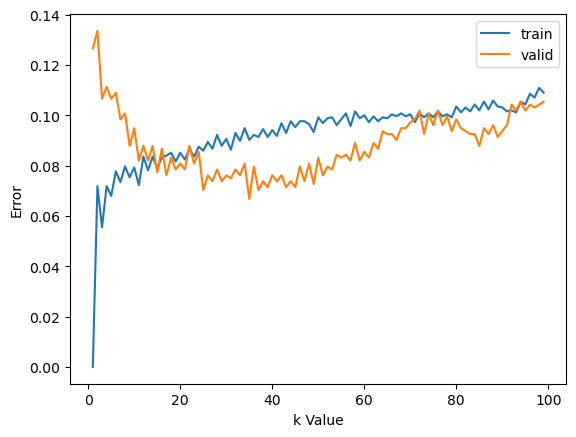

In [33]:
# Let's do model building
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

error1= []
error2= []
for k in range(1,100):
    loan_knn= KNeighborsClassifier(n_neighbors=k)
    loan_knn.fit(x_train,y_train)
    y_pred1= loan_knn.predict(x_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= loan_knn.predict(x_val)
    error2.append(np.mean(y_val!= y_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(1,100),error1,label="train")
plt.plot(range(1,100),error2,label="valid")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

As we can see from above graph we can see when value of 'k' is low there is high variance meaning there is low training error and high validation error.
And as we increase value of k training error is getting increased and validation error is getting decreased. After som point it also introduces high bias i.e. both training error and validation error is getting increased.


But we can see validation data error is lowest between 30-40 so let's choose 35 as k value and see how model performs

In [35]:
loanpred_knn= KNeighborsClassifier(n_neighbors=35)

loanpred_knn.fit(x_train, y_train)

train_pred= loanpred_knn.predict(x_train)

val_pred =  loanpred_knn.predict(x_val)


train_accuracy = loanpred_knn.score(x_train,y_train)
print("Accuracy of the model on train data = ",train_accuracy)
# Getting the accuracy on test data
val_accuracy = loanpred_knn.score(x_val,y_val)
print("Accuracy of the model on validation data = ",val_accuracy)
from sklearn.metrics import classification_report
# Generating the report and printing the same
print(classification_report(y_val,val_pred))


output = pd.DataFrame({"Actual" : y_val, "Predicted" : val_pred})
print(output)

Accuracy of the model on train data =  0.9098008590394377
Accuracy of the model on validation data =  0.9332552693208431
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       542
           1       0.90      0.92      0.91       312

    accuracy                           0.93       854
   macro avg       0.93      0.93      0.93       854
weighted avg       0.93      0.93      0.93       854

      Actual  Predicted
1415       0          0
3331       0          0
3394       1          1
265        0          0
1126       1          1
...      ...        ...
1827       1          1
1761       0          1
3369       0          1
1581       0          0
15         0          0

[854 rows x 2 columns]


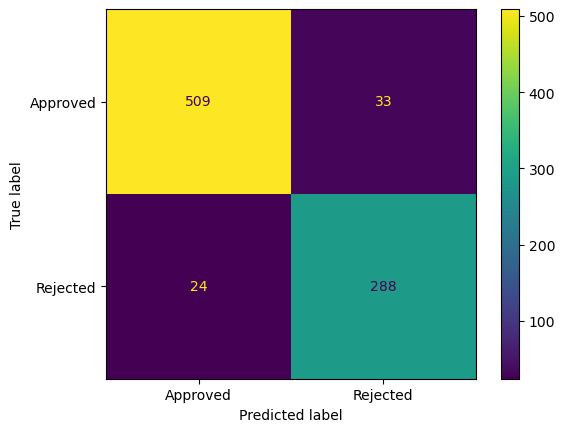

In [36]:
from sklearn import metrics

    
    
confusion_matrix = metrics.confusion_matrix(y_val, val_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Approved", "Rejected"])

cm_display.plot()
plt.show()


From Above we can see we have achieved good level of accuracy in predicting loan approval validation dataset.

Now let's test this on our test data.


In [37]:
test_pred = loanpred_knn.predict(x_test)
test_acc = loanpred_knn.score(x_test, y_test)

print("Test score: ", test_acc)
print(classification_report(y_test, test_pred))

Test score:  0.9238875878220141
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       542
           1       0.90      0.89      0.90       312

    accuracy                           0.92       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.92      0.92      0.92       854



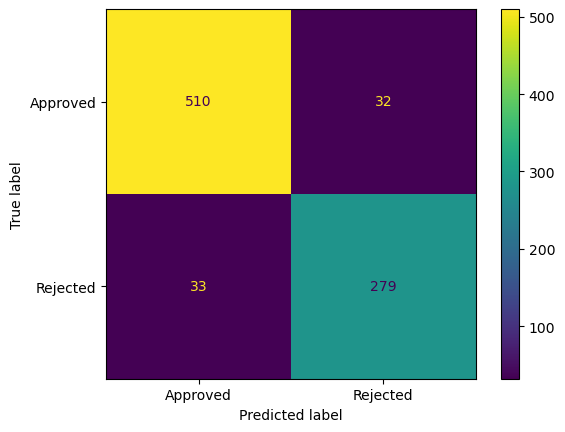

In [38]:
from sklearn import metrics

    
    
confusion_matrix = metrics.confusion_matrix(y_test, test_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Approved", "Rejected"])

cm_display.plot()
plt.show()